# Portfolio estimation

Small functions to visualize stock market data and calculate basic portfolio numbers

In [1]:
from finance import plot_accumulated_log_return, get_asset_returns, plot_price,plot_adjusted_price, plot_instruments_correlation, plot_mean_avg, correlation_matrix, getData
from sklearn.metrics import mean_squared_error, r2_score
from pandas_datareader.data import DataReader
from pandas_datareader.moex import MoexReader
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
sns.set_style("whitegrid")
%matplotlib inline

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
tickers = """
HDV
DVY
QQQ
TQQQ
GAMR
IBUY
ARKW
FINX
ICLN
QCLN
TAN
VCLT
LQD
TLT
TMF
ZROZ
GLTR
VHT
ITA
JETS
VDC
VNQ
EQIX
IRM
GNL
SBRA
APLE
FXI
MCHI
INDY
INDA
EWY
VNM
EWA
IPO""".strip().split()

In [3]:
start_date = "2015-01-02"
end_date = "2020-11-01"
tickers_data =  getData(tickers, start_date=start_date, end_date=end_date)

HDV First not NA value date: 2015-01-02 00:00:00
DVY First not NA value date: 2015-01-02 00:00:00
QQQ First not NA value date: 2015-01-02 00:00:00
TQQQ First not NA value date: 2015-01-02 00:00:00
GAMR First not NA value date: 2016-03-10 00:00:00
IBUY First not NA value date: 2016-04-20 00:00:00
ARKW First not NA value date: 2015-01-02 00:00:00
FINX First not NA value date: 2016-09-13 00:00:00
ICLN First not NA value date: 2015-01-02 00:00:00
QCLN First not NA value date: 2015-01-02 00:00:00
TAN First not NA value date: 2015-01-02 00:00:00
VCLT First not NA value date: 2015-01-02 00:00:00
LQD First not NA value date: 2015-01-02 00:00:00
TLT First not NA value date: 2015-01-02 00:00:00
TMF First not NA value date: 2015-01-02 00:00:00
ZROZ First not NA value date: 2015-01-02 00:00:00
GLTR First not NA value date: 2015-01-02 00:00:00
VHT First not NA value date: 2015-01-02 00:00:00
ITA First not NA value date: 2015-01-02 00:00:00
JETS First not NA value date: 2015-04-30 00:00:00
VDC First

In [9]:
daily_asset_returns = get_asset_returns(tickers_data, relativedelta(days=1))

In [20]:
X_name = "INDY"
Y_name = "INDA"
regressor = LinearRegression(fit_intercept=False)
regressor.fit(daily_asset_returns[[X_name]], daily_asset_returns[Y_name])
y_predicted = regressor.predict(daily_asset_returns[[X_name]])
regressor.intercept_ = regressor.intercept_ if abs(regressor.intercept_) > 1e-4 else 0.0 
regression = f"{regressor.coef_[0]:.3f}*{X_name}+{regressor.intercept_:.3}"
print(f"{Y_name} = {regression}")
print('Mean squared error: %.2f' % mean_squared_error(daily_asset_returns[Y_name], y_predicted))
print('Coefficient of determination: %.2f' % r2_score(daily_asset_returns[Y_name], y_predicted))

INDA = 1.047*INDY+0.0
Mean squared error: 0.00
Coefficient of determination: 0.94


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


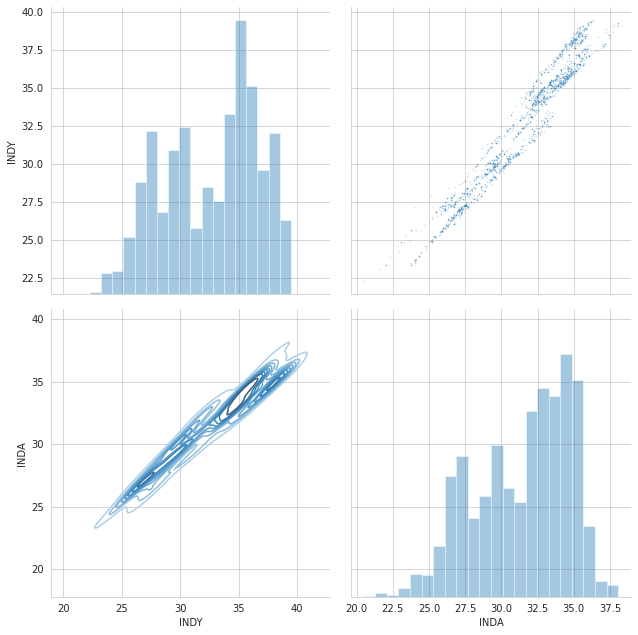

In [21]:
plot_instruments_correlation(tickers_data[[X_name, Y_name]])

In [22]:
y_predicted[np.abs(y_predicted) < 1e-4] = 0
tickers_data[regression] = (1 + y_predicted).cumprod()

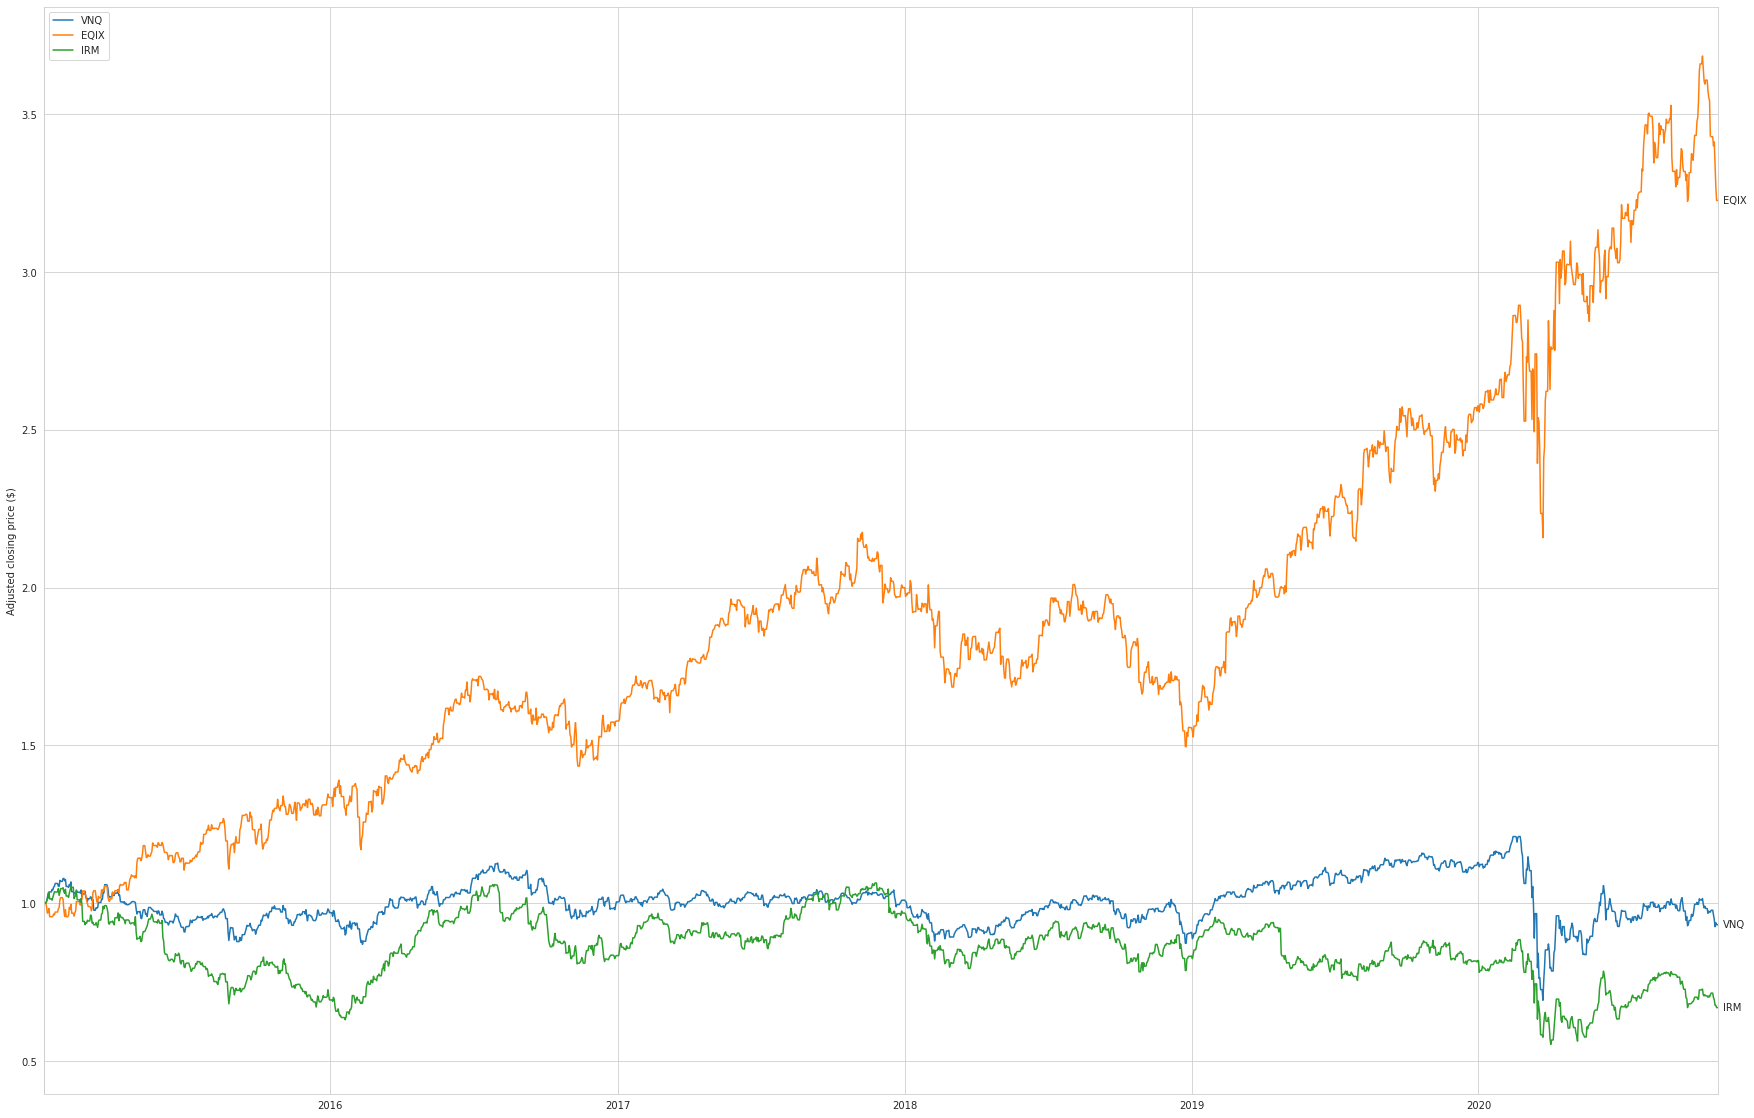

In [26]:
to_plot = ["VNQ","EQIX", "IRM"]
from_date = None# "2020-01-01"
ax = plot_adjusted_price(tickers_data.loc[from_date:, to_plot], (30,20))
# ax.set_yscale("log")

In [ ]:
log_returns = np.log(tickers_data) - np.log(tickers_data.iloc[0, :])
portfolio_weights = pd.Series(1 / 3, index=tickers_data.columns)

In [ ]:
portfolio_log_returns = portfolio_weights.dot(log_returns.transpose())
ax = portfolio_log_returns.plot(figsize=(16,10))
ax.set_ylabel('Portfolio cumulative log returns')

In [7]:
# Calculating the time-related parameters of the simulation
total_days_in_simulation = (tickers_data.index[-1] - tickers_data.index[0]).days
number_of_years = total_days_in_simulation / 365.25

# The last data point will give us the total portfolio return
total_portfolio_return = np.exp(portfolio_log_returns[-1])
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 356.60%
Average yearly return is: 41.10%


# Portfolio Return analysis

In [3]:
dates = [
    ("2017-11-01", "2018-11-01"),
    ("2017-05-01", "2018-05-01"),
    ("2016-11-01", "2017-11-01"),
    ("2016-05-01", "2017-05-01"),
    ("2015-11-01", "2016-11-01"),
    ("2015-05-01", "2016-05-01"),
]
start_dates, end_dates = zip(*dates)
start_dates = list(map(pd.Timestamp, start_dates))
end_dates = list(map(pd.Timestamp, end_dates))

#portfolio_weights["portfolio2"] = 0
shares = {
"FXGD": 0.1,
"FXMM": 0.025,
"FXJP": 0.075,
"FXRB": 0.15,
"FXRU": 0.15,
"FXIT": 0.025,
"MOEX": 0.025,
"PLZL": 0.035,
"MTSS": 0.035,
"LSNGP": 0.025,
"yndx": 0.04,
"AFLT": 0.04,
"PIKK": 0.04,
"V": 0.025,
"NVDA": 0.025,
"INTC": 0.025,
"AAPL":0.025,
"FB": 0.01,
"NFLX": 0.02,
"USD000UTSTOM": 0,
"EUR_RUB__TOM": 0.105,
}
print(sum(shares.values()))


symbols = list(shares.keys())

1.0


In [ ]:
pd.Series()

In [6]:
#symbols = ["USD000UTSTOM", "EUR_RUB__TOM", "yndx"]

def getMoexData(symbol, start_date, end_date):
    t = MoexReader(symbol, start_date, end_date).read()
    t = t[~t.CLOSE.isna()]
    boardid = t.BOARDID.groupby(t.BOARDID).count().idxmax()
    t = t[t.BOARDID == boardid]
    #t = t.groupby(t.index).aggregate({"CLOSE": "max"})
    t = t.drop_duplicates()
    t.index = pd.DatetimeIndex(t.index)
    t = t[~t.CLOSE.isna()]
    return t.CLOSE

def getOtherData(symbol, start_date, end_date):
    try:
        #Yahoo
        data = DataReader([symbol], 'yahoo', start_date, end_date)
        tickers_data = data["Close"]
    except:
        #iex
        data = DataReader([symbol], 'iex', start_date, end_date)
        tickers_data = data["close"]
    return tickers_data

def getData(symbols, start_date, end_date):
    res = pd.DataFrame(columns=symbols, index=pd.date_range(pd.Timestamp(start_date), pd.Timestamp(end_date)))
    for s in symbols:
        print(s)
        try:
            res[s] = getMoexData(s, start_date, end_date)
        except:
            res[s] = getOtherData(s, start_date, end_date)
    res[res==0] = float("nan")
    return res.fillna(method="ffill").fillna(method="bfill")

In [18]:
symbols= ["USD000UTSTOM", "USD000TODTOM"]
start_date = "2000-01-01"
end_date = "2019-03-01"
tickers_data =  getData(symbols, start_date=start_date, end_date=end_date)

USD000UTSTOM


/home/k/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: pandas.core.common.is_list_like is deprecated. import from the public API: pandas.api.types.is_list_like instead
  after removing the cwd from sys.path.


USD000TODTOM


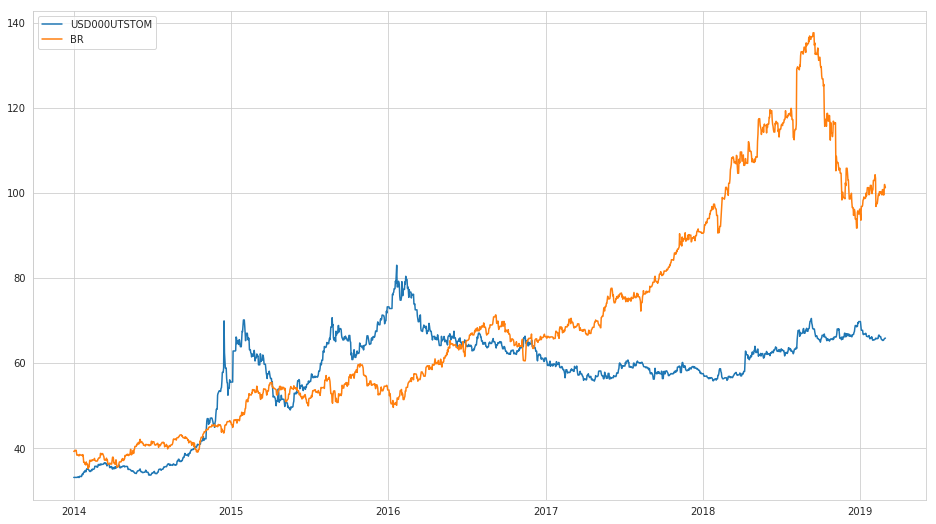

In [14]:
tickers_data.plot(figsize=(16,9))

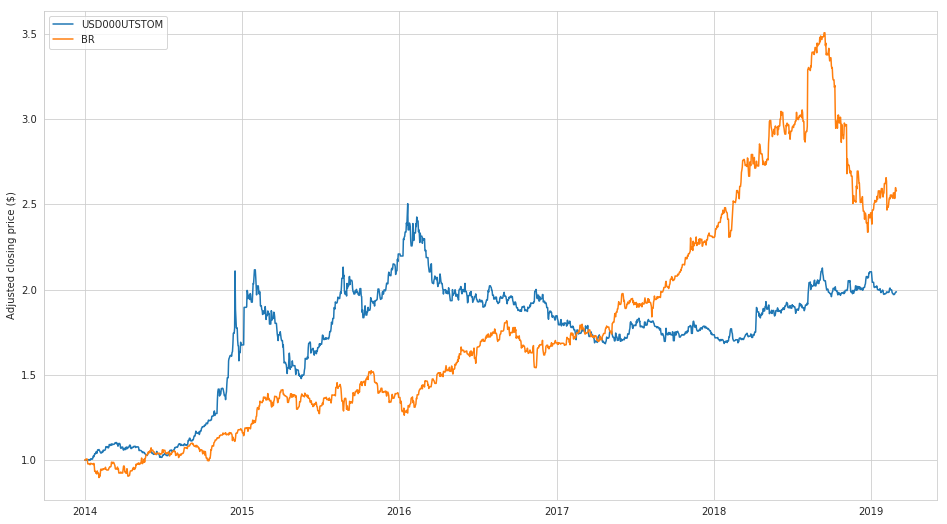

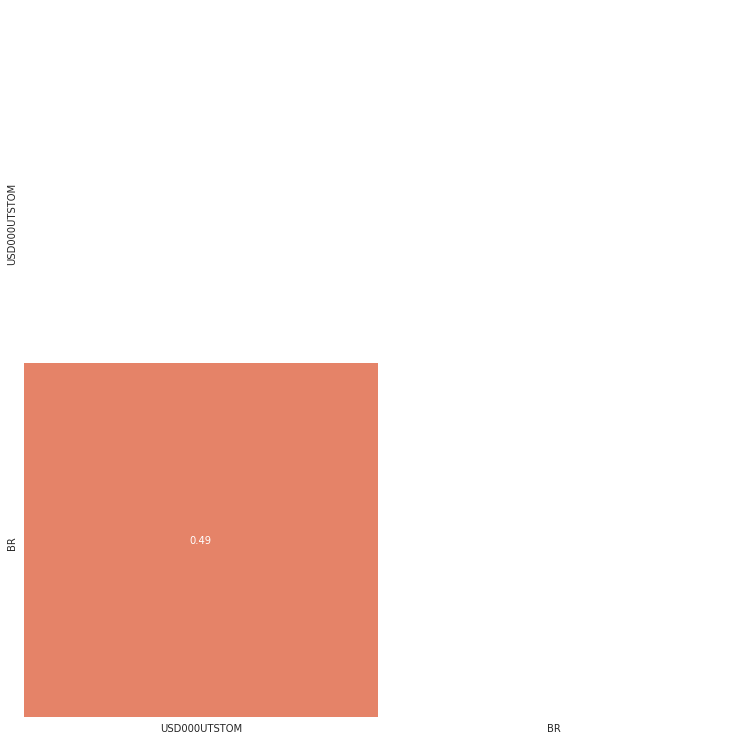

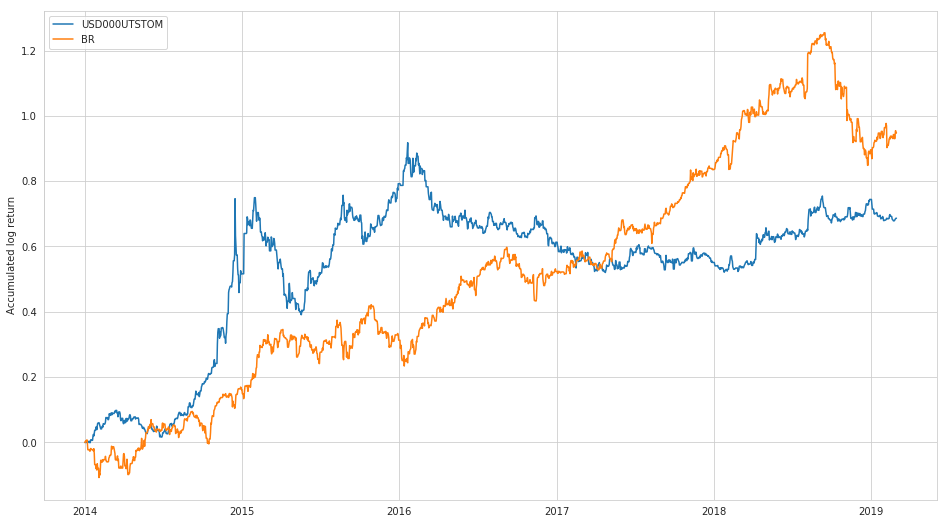

In [11]:
plot_adjusted_price(tickers_data)
correlation_matrix(tickers_data)
plot_accumulated_log_return(tickers_data)

In [12]:
plot_accumulated_log_return(tickers_data[["yndx", "FXRB", "FXRU", "EUR_RUB__TOM", "USD000UTSTOM"]])
plot_adjusted_price(tickers_data[["yndx", "FXRB", "FXRU", "EUR_RUB__TOM", "USD000UTSTOM"]])

KeyError: "['yndx' 'FXRB' 'FXRU' 'EUR_RUB__TOM'] not in index"

In [81]:
returns = tickers_data.loc[end_dates, :].reset_index(drop=True) / tickers_data.loc[start_dates, :].reset_index(drop=True)
returns.index = end_dates
returns

,MTSS,NVDA,V,EUR_RUB__TOM,FXRU,NFLX,AAPL,yndx,FXIT,MOEX,...,LSNGP,FXGD,FB,INTC,FXJP,PLZL,PIKK,AFLT,USD000UTSTOM,FXMM
2018-11-01,0.897480,1.052654,1.267939,1.110474,1.129283,1.602929,1.331536,1.003766,1.271702,0.748627,...,1.134364,1.080229,0.830778,1.032327,1.056139,0.861400,1.137665,0.587508,1.128670,1.055352
2018-05-01,1.082344,2.129970,1.397217,1.213440,1.121113,2.016736,1.153636,1.366895,1.373048,1.049544,...,2.174710,1.133789,1.140365,1.468741,1.309904,0.906924,1.062804,0.819346,1.107606,1.069345
2017-11-01,1.286321,3.000724,1.360818,0.971942,0.974203,1.605839,1.496906,1.601528,1.259049,1.031822,...,1.746625,0.904145,1.410502,1.353129,1.090050,1.096789,1.078765,1.230230,0.922626,1.082853
2017-05-01,1.082411,3.001407,1.181512,0.846197,0.934251,1.725536,1.563687,1.179477,1.179343,1.126285,...,3.535836,0.854758,1.296649,1.199141,1.008593,0.923867,1.151418,2.268327,0.886254,1.084009
2016-11-01,1.073932,2.433909,1.052075,0.983305,1.073290,1.137664,0.932971,1.223917,1.065406,1.276714,...,3.979339,1.100760,1.269981,1.019492,1.006006,1.559858,1.295281,2.735510,0.985953,1.092566
2016-05-01,0.954717,1.561758,1.174396,1.285885,1.400428,1.131375,0.726948,1.299700,1.192932,1.326623,...,1.344037,1.378596,1.488543,0.906044,1.110979,3.086084,1.303646,2.030931,1.245369,1.110991


In [82]:
returns.describe()

,MTSS,NVDA,V,EUR_RUB__TOM,FXRU,NFLX,AAPL,yndx,FXIT,MOEX,...,LSNGP,FXGD,FB,INTC,FXJP,PLZL,PIKK,AFLT,USD000UTSTOM,FXMM
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.062868,2.196737,1.238993,1.068540,1.105428,1.536680,1.200947,1.279214,1.223580,1.093269,...,2.319152,1.075380,1.239470,1.163146,1.096945,1.405820,1.171596,1.611975,1.046079,1.082519
std,0.134063,0.783163,0.128941,0.164940,0.164557,0.346057,0.327093,0.200435,0.103759,0.206718,...,1.178114,0.186556,0.233384,0.216624,0.112550,0.862564,0.104639,0.859323,0.137639,0.019108
min,0.897480,1.052654,1.052075,0.846197,0.934251,1.131375,0.726948,1.003766,1.065406,0.748627,...,1.134364,0.854758,0.830778,0.906044,1.006006,0.861400,1.062804,0.587508,0.886254,1.055352
25%,0.984521,1.703811,1.176175,0.974783,0.998975,1.253980,0.988137,1.190587,1.182741,1.036253,...,1.444684,0.948166,1.172769,1.022701,1.020479,0.911160,1.093490,0.922067,0.938458,1.072722
50%,1.078138,2.281940,1.224726,1.046889,1.097201,1.604384,1.242586,1.261809,1.225991,1.087914,...,1.960668,1.090495,1.283315,1.115734,1.073094,1.010328,1.144542,1.630580,1.046779,1.083431
75%,1.082394,2.859020,1.337599,1.187698,1.127241,1.695612,1.455563,1.350096,1.268539,1.239107,...,3.195555,1.125532,1.382039,1.314632,1.105746,1.444091,1.259315,2.208978,1.123404,1.090427
max,1.286321,3.001407,1.397217,1.285885,1.400428,2.016736,1.563687,1.601528,1.373048,1.326623,...,3.979339,1.378596,1.488543,1.468741,1.309904,3.086084,1.303646,2.735510,1.245369,1.110991


In [83]:
returns.std().sort_values().index

Index(['FXMM', 'FXRB', 'FXIT', 'PIKK', 'FXJP', 'V', 'MTSS', 'USD000UTSTOM',
       'FXRU', 'EUR_RUB__TOM', 'FXGD', 'yndx', 'MOEX', 'INTC', 'FB', 'AAPL',
       'NFLX', 'NVDA', 'AFLT', 'PLZL', 'LSNGP'],
      dtype='object')

In [84]:
returns.describe()[returns.std().sort_values().index]

,FXMM,FXRB,FXIT,PIKK,FXJP,V,MTSS,USD000UTSTOM,FXRU,EUR_RUB__TOM,...,yndx,MOEX,INTC,FB,AAPL,NFLX,NVDA,AFLT,PLZL,LSNGP
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.082519,1.132626,1.223580,1.171596,1.096945,1.238993,1.062868,1.046079,1.105428,1.068540,...,1.279214,1.093269,1.163146,1.239470,1.200947,1.536680,2.196737,1.611975,1.405820,2.319152
std,0.019108,0.075856,0.103759,0.104639,0.112550,0.128941,0.134063,0.137639,0.164557,0.164940,...,0.200435,0.206718,0.216624,0.233384,0.327093,0.346057,0.783163,0.859323,0.862564,1.178114
min,1.055352,1.025550,1.065406,1.062804,1.006006,1.052075,0.897480,0.886254,0.934251,0.846197,...,1.003766,0.748627,0.906044,0.830778,0.726948,1.131375,1.052654,0.587508,0.861400,1.134364
25%,1.072722,1.088349,1.182741,1.093490,1.020479,1.176175,0.984521,0.938458,0.998975,0.974783,...,1.190587,1.036253,1.022701,1.172769,0.988137,1.253980,1.703811,0.922067,0.911160,1.444684
50%,1.083431,1.141936,1.225991,1.144542,1.073094,1.224726,1.078138,1.046779,1.097201,1.046889,...,1.261809,1.087914,1.115734,1.283315,1.242586,1.604384,2.281940,1.630580,1.010328,1.960668
75%,1.090427,1.167113,1.268539,1.259315,1.105746,1.337599,1.082394,1.123404,1.127241,1.187698,...,1.350096,1.239107,1.314632,1.382039,1.455563,1.695612,2.859020,2.208978,1.444091,3.195555
max,1.110991,1.240343,1.373048,1.303646,1.309904,1.397217,1.286321,1.245369,1.400428,1.285885,...,1.601528,1.326623,1.468741,1.488543,1.563687,2.016736,3.001407,2.735510,3.086084,3.979339


In [86]:
portfolio_weights = pd.DataFrame(index=tickers_data.columns)
portfolio_weights["portfolio1"] = 1 / len(tickers_data.columns)
portfolio_weights["portfolio2"] = pd.Series(shares)

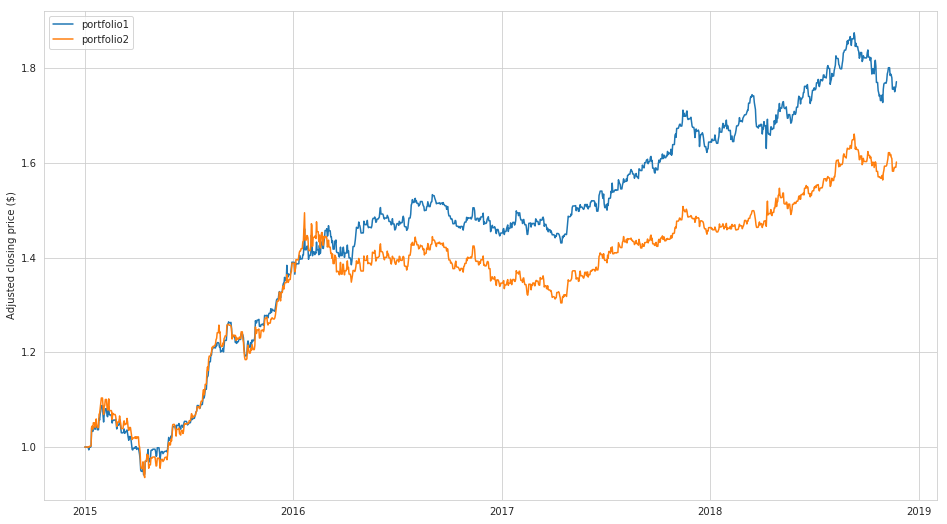

In [87]:
portfolios = tickers_data.dot(portfolio_weights)
plot_adjusted_price(portfolios)

In [91]:
# Calculating the time-related parameters of the simulation
total_days_in_simulation = (tickers_data.index[-1] - tickers_data.index[0]).days
number_of_years = total_days_in_simulation / 365.25

# The last data point will give us the total portfolio return
total_portfolio_return = portfolios.iloc[-1] / portfolios.iloc[0]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

TypeError: non-empty format string passed to object.__format__

In [92]:
average_yearly_return

portfolio1    0.299269
portfolio2    0.278375
dtype: float64